In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [27]:
# 一、构造数据
X1 = np.array([
    [10, 1],
    [15, 1],
    [20, 1],
    [30, 1],
    [50, 2],
    [60, 1],
    [60, 2],
    [70, 2]]).reshape((-1, 2))

Y = np.array([0.8, 1.0, 1.8, 2.0, 3.2, 3.0, 3.1, 3.5]).reshape((-1, 1))

In [28]:
flag = True

if flag:
    # 添加一个截距项对应的X值
    X = np.column_stack((X1, np.ones(shape=(X1.shape[0], 1))))
    # X = np.hstack((X1,np.ones(shape=(X1.shape[0], 1))))
else:
    # 不加入截距项
    X = X1

In [29]:
# 二、为了求解比较方便，将numpy的'numpy.ndarray'的数据类型转换为矩阵的形式的。
X = np.mat(X)

Y = np.mat(Y)

print(X)
print(Y)

[[10.  1.  1.]
 [15.  1.  1.]
 [20.  1.  1.]
 [30.  1.  1.]
 [50.  2.  1.]
 [60.  1.  1.]
 [60.  2.  1.]
 [70.  2.  1.]]
[[0.8]
 [1. ]
 [1.8]
 [2. ]
 [3.2]
 [3. ]
 [3.1]
 [3.5]]


In [30]:
# 三、根据解析式的公式求解theta的值
theta = (X.T * X).I * X.T * Y

print(theta)

[[0.03921348]
 [0.25262172]
 [0.40861423]]


In [31]:
# 四、 根据求解出来的theta求出预测值
predict_y = X * theta

In [32]:
mse = mean_squared_error(y_true=np.asarray(Y),y_pred=np.asarray(predict_y))

r2 = r2_score(y_true=np.asarray(Y),y_pred=np.asarray(predict_y))

print(mse)
print(r2)

0.05469569288389515
0.9428765609567675


In [33]:
# 基于训练好的模型参数对一个未知的样本做一个预测
if flag:
    x = np.mat(np.array([[55.0, 2.0,1.0]]))
else:
    x = np.mat(np.array([[55.0, 2.0]]))
    
pred_y = x * theta

print("当面积为55平并且房间数目为2的时候，预测价格为:{}".format(pred_y))

当面积为55平并且房间数目为2的时候，预测价格为:[[3.07059925]]


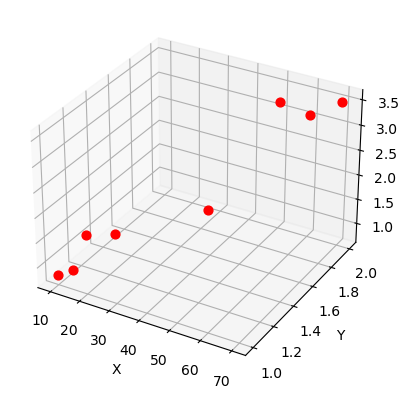

In [34]:
# 四、画图可视化(TODO: 自己更改为立体的图像)
from mpl_toolkits.mplot3d import Axes3D

x1 = X[:, 0]

x2 = X[:, 1]

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, Y, s=40, c='r', depthshade=False)  ###画点图

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [35]:
x1 = np.arange(0, 100)

x2 = np.arange(0, 4)

x1, x2 = np.meshgrid(x1, x2)

In [36]:
def predict(x1, x2, theta, base=False):
    if base:
        y_ = x1 * theta[0] + x2 * theta[1] + theta[2]
    else:
        y_ = x1 * theta[0] + x2 * theta[1]
    return y_

In [37]:
z = np.array(list(map(lambda t: predict(t[0], t[1], theta, base=flag), zip(x1.flatten(), x2.flatten()))))

z.shape = x1.shape

print(z.shape)

ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap=plt.cm.jet)  ##画超平面   cmap=plt.cm.jet彩图

ax.set_title(u'房屋租赁价格预测')

plt.show()

(4, 100)
